# TUTORIAL
# Coloured noise

The function ```colour_noise``` is included in *essentials.Util*


In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')

rng = np.random.default_rng(6)


In [13]:
def colour_noise(Nt=1000, noise_colour='pink', beta=2):
    ff = np.fft.rfftfreq(Nt)
    if 'white' in noise_colour.lower():
        return np.ones(ff.shape)
    elif 'blue' in noise_colour.lower():
        return np.sqrt(ff)
    elif 'violet' in noise_colour.lower():
        return ff
    elif 'pink' in noise_colour.lower():
        number_ids = [int(xx) for xx in noise_colour if xx.isdigit()]
        if any(number_ids):
            from re import findall
            beta = float(findall(r'\d+\.*\d*', noise_colour)[0])
        return 1 / np.where(ff == 0., float('inf'), ff ** (1 / beta))
    elif 'brown' in noise_colour.lower():
        return 1 / np.where(ff == 0., float('inf'), ff)
    else:
        raise ValueError('{} noise type not defined'.format(noise_colour))


In [14]:
print(rng.standard_normal(N).mean())

-0.005450912805472463


In [15]:
N = 100000


noise_white = np.fft.rfft(rng.standard_normal(N))
freq = np.fft.rfftfreq(N)

BETAS = np.arange(5)
COLOURS = ['white', 'pink', 'brown', 'blue', 'darkviolet']
NOISES = []
PSDS = []

for beta_val, noise_c in zip(BETAS, COLOURS):
    S = colour_noise(N, noise_colour=noise_c)
    S = noise_white * S / np.sqrt(np.mean(S ** 2))  # Normalize S
    noise = np.fft.irfft(S)  # transform back into time domain

    # Store
    PSDS.append(abs(S))
    NOISES.append(noise)



white -0.0006255915168779773
pink 4.5474735088646416e-18
brown -9.094947017729283e-18
blue -7.815970093361102e-19
darkviolet -1.2123635428906708e-18


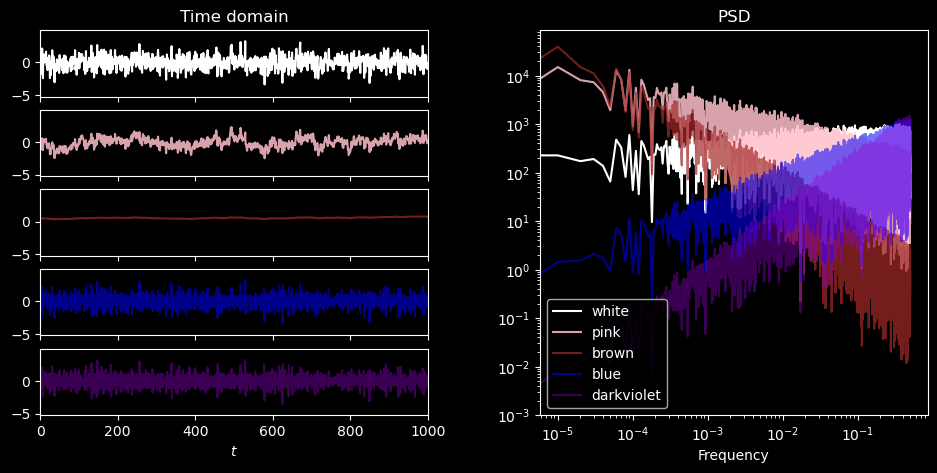

In [18]:

fig = plt.figure(figsize=(10, 5))
sfigs = fig.subfigures(1, 2)
ax = sfigs[1].subplots(1, 1)
freq = np.fft.rfftfreq(len(NOISES[0]))
alpha = 1
for psd, c in zip(PSDS, COLOURS):
    ax.loglog(freq, psd, color=c, alpha=alpha)
    alpha -= 0.15
ax.legend(COLOURS)
ax.set(xlabel='Frequency', ylim=[1e-3, None], title='PSD')
    
axs = sfigs[0].subplots(len(COLOURS), 1, sharex='col', sharey='col')
alpha = 1
N_plot = 1000
for ax, noise, c in zip(axs, NOISES, COLOURS):
    ax.plot(np.arange(N), noise, color=c, alpha=alpha)
    alpha -= 0.15
    print(c, noise.mean())
axs[0].set(title='Time domain', xlim=[0, N_plot])
axs[-1].set(xlabel='$t$');


We can observe that
* White noise has an almost-flat PSD, i.e., all the frequencies are equally present
* Brownian and pink noises strength is lowest at higher frequencies, which is visualized in the time domain with seamingly non-zero mean
* etc